# Fixed-Flat Appliance

In [1]:
# importing functions
from ramp import User,calc_peak_time_range,yearly_pattern
import pandas as pd

### Creating a user

In [2]:
school = User(
    user_name = "School",
    num_users = 1
)

### Adding an appliance with flat and fixed consumption

In [3]:
indoor_bulb = school.Appliance(
    name = "Indoor Light Bulb",
    number = 10,
    power  = 25,
    num_windows = 1,
    func_time = 210,
    time_fraction_random_variability = 0.2,
    func_cycle = 60,
    fixed = "yes",
    flat = "yes",
    
)
indoor_bulb.windows(
    window_1 = [1200,1440], # from 20:00 to 24:00
    window_2 = [0,0], 
    random_var_w = 0.35,
)

### Defining the peak time range using the calc_peak_time_range

In [4]:
peak_time_range = calc_peak_time_range(
    user_list = [school]
)

### Defining the yearly patterns
by default the yearly_pattern function returns weekdays (defined by 0) /weekends (defined by 1) division

In [5]:
year_behaviour = yearly_pattern()

### Generating a profile for the 1st week of the year

In [8]:
first_week = []

for i in range(7):
    first_week.extend(
        school.generate_single_load_profile(
            prof_i = i, # the day to generate the profile
            peak_time_range = peak_time_range,
            Year_behaviour = year_behaviour
        )
    )
    

<AxesSubplot:>

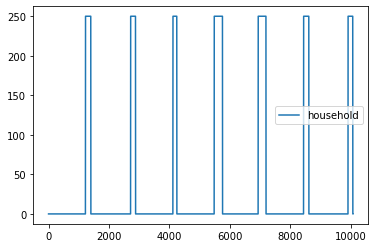

In [9]:
first_week = pd.DataFrame(first_week,columns=["household"])
first_week.plot()